In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

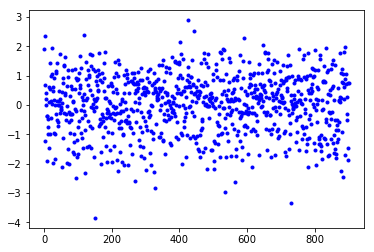

In [5]:
path = '/p/project/training2005/HZG_Challenge/'

temperature_data = np.load(path+'tas_train.npy')
pressure_data = np.load(path+'psl_train.npy')


x_train_full = np.concatenate([temperature_data, pressure_data], axis=1)


nao_data = np.load(path+'nao_index_train.npy')

tmp_x = np.linspace(0, len(nao_data), len(nao_data))

plt.plot(tmp_x, nao_data, 'b.')
plt.show()

In [6]:
pca = PCA(n_components=50)

pca_temp = pca.fit_transform(temperature_data)

print(pca_temp)

print(pca.explained_variance_ratio_)

[[ 4.09655951e+00  1.62798288e+01 -1.13944421e+01 ... -1.32142301e+00
  -4.02028276e+00  3.19910770e-01]
 [-9.18519807e+00 -2.73589342e+01 -4.37988030e+00 ...  9.17774056e-01
  -9.10093877e-01  1.77206495e+00]
 [ 2.35475431e+01  5.28724436e+00 -1.98232371e+01 ...  3.44222495e+00
  -2.94704114e-01 -1.90900805e-02]
 ...
 [-1.35147715e+00 -1.88854269e+01 -3.52691599e+01 ... -1.02868305e+00
  -2.45548494e+00 -1.25687326e+00]
 [ 4.55894499e+01  2.14942137e+01 -1.27128348e+01 ... -2.73036945e+00
   4.32973652e-02 -4.68861535e-01]
 [ 2.62206834e+01 -1.42453936e+01  7.46814851e+00 ...  2.01829699e+00
  -2.60506600e+00  1.53222923e+00]]
[0.139324   0.08886949 0.08387699 0.06725111 0.05784979 0.04628902
 0.04110706 0.03692171 0.0271803  0.02323685 0.02261667 0.02123957
 0.01944782 0.01610227 0.01520486 0.01439683 0.01356993 0.0122921
 0.01148158 0.01075819 0.00956839 0.00779558 0.0072168  0.00705343
 0.00634401 0.00613418 0.00562966 0.00522838 0.00477947 0.00455712
 0.00425549 0.00418571 0.00402

In [7]:
pca_press = pca.fit_transform(pressure_data)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.30490791 0.18400934 0.07381419 0.06671203 0.06166861 0.05263237
 0.03733528 0.0288457  0.02491261 0.01680746 0.01616275 0.01394154
 0.01269437 0.01039641 0.00871227 0.00683595 0.0065405  0.00577146
 0.00498761 0.00454754 0.00414056 0.0035176  0.00308141 0.00295469
 0.00262907 0.00232871 0.00223747 0.00216999 0.00185604 0.00157332
 0.00155057 0.00140081 0.0013316  0.00123748 0.0011494  0.00108885
 0.00104446 0.0009467  0.00085657 0.00080332 0.00074315 0.00071773
 0.00067387 0.00063728 0.00059264 0.00057115 0.00054763 0.00052248
 0.0004792  0.00046037]
0.9860800415289425


In [8]:
pca_train = np.concatenate([pca_temp, pca_press], axis=1)
print(pca_train.shape)
binary_labels = np.sign(nao_data)

(900, 100)


In [9]:
rf = RandomForestClassifier(random_state=1337)

In [10]:
rf.fit(pca_train, binary_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1337,
                       verbose=0, warm_start=False)

In [11]:
cross_val_score(rf, pca_train, binary_labels, cv=5)

array([0.58888889, 0.53888889, 0.53888889, 0.57777778, 0.60555556])